<a href="https://colab.research.google.com/github/shamim237/ML-Handcrafted_Features/blob/main/SIFT_SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pickle
from skimage.feature import hog
import random
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score

from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [ ]:
# img_dir = '/content/drive/MyDrive/digit_dataset'

In [ ]:
#categories = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

In [ ]:
# data = []

# for category in categories:
#   path = os.path.join(img_dir, category)
#   label = categories.index(category)

#   for img in os.listdir(path):
#     img_path = os.path.join(path, img)
#     img_data = cv2.imread(img_path)
#     #resized_img = cv2.resize(img_data, (128, 128))
#     gray= cv2.cvtColor(img_data,cv2.COLOR_BGR2GRAY)
#     # create SIFT feature extractor
#     sift = cv2.xfeatures2d.SIFT_create()
#     # detect features from the image
#     keypoints, descriptors = sift.detectAndCompute(img_data, None)
#     # draw the detected key points
#     sift_image = cv2.drawKeypoints(gray, keypoints, img_data)
#     image = np.array(sift_image).flatten()
#     data.append([image, label])

In [ ]:
#print(len(data))

In [ ]:
# pick_in = open('/content/drive/MyDrive/Colab Notebooks/sift_sign_data.pickle', 'wb')
# pickle.dump(data, pick_in)
# pick_in.close()

In [ ]:
pick_in = open('/content/drive/MyDrive/Colab Notebooks/sift_sign_data.pickle', 'rb')
data = pickle.load(pick_in)
pick_in.close()

In [ ]:
random.shuffle(data)
features = []
labels = []

In [ ]:
for feature,label in data:
    features.append(feature)
    labels.append(label)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.11, shuffle=True)

In [ ]:
print(len(x_test))

938


In [ ]:
rbf = SVC(kernel='rbf').fit(x_train, y_train)

In [ ]:
rbf_pred = rbf.predict(x_test)

In [ ]:
lin = SVC(kernel='linear').fit(x_train, y_train)

In [ ]:
lin_pred = lin.predict(x_test)

In [ ]:
poly = SVC(kernel = 'poly')

In [ ]:
model= poly.fit(x_train, y_train)

In [ ]:
poly_pred = poly.predict(x_test)

In [ ]:
rbf_accuracy = accuracy_score(y_test, rbf_pred)
rbf_f1 = f1_score(y_test, rbf_pred, average='weighted')
rbf_precision = precision_score(y_test, rbf_pred, average= 'weighted')
rbf_recall = recall_score(y_test, rbf_pred, average= 'weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (rbf_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (rbf_f1*100))
print('Precision: ', "%.2f" % (rbf_precision*100))
print('Recall: ', "%.2f" % (rbf_recall*100))

Accuracy (RBF Kernel):  95.10
F1 (RBF Kernel):  95.11
Precision:  95.18
Recall:  95.10


In [ ]:
poly_accuracy = accuracy_score(y_test, poly_pred)
poly_f1 = f1_score(y_test, poly_pred, average='weighted')
poly_precision = precision_score(y_test, poly_pred, average= 'weighted')
poly_recall = recall_score(y_test, poly_pred, average= 'weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (poly_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (poly_f1*100))
print('Precision: ', "%.2f" % (poly_precision*100))
print('Recall: ', "%.2f" % (poly_recall*100))

Accuracy (RBF Kernel):  98.93
F1 (RBF Kernel):  98.93
Precision:  98.94
Recall:  98.93


In [ ]:
lin_accuracy = accuracy_score(y_test, lin_pred)
lin_f1 = f1_score(y_test, lin_pred, average='weighted')
lin_precision = precision_score(y_test, lin_pred, average= 'weighted')
lin_recall = recall_score(y_test, lin_pred, average= 'weighted')
print('Accuracy (RBF Kernel): ', "%.2f" % (lin_accuracy*100))
print('F1 (RBF Kernel): ', "%.2f" % (lin_f1*100))
print('Precision: ', "%.2f" % (lin_precision*100))
print('Recall: ', "%.2f" % (lin_recall*100))

Accuracy (Linear Kernel):  93.14
F1 (Linear Kernel):  93.12


In [ ]:
cm = confusion_matrix(y_test, lin_pred) 

print(cm)

[[161   0   0   0   1   2   2   1   1   2]
 [  0 184   6   2   0   0   2   0   0   0]
 [  0   6 146   1   4   0   2   1   2   0]
 [  0   9   7 152   1   0   0   0   0   0]
 [  0   2   2   2 158   3   0   2   2   0]
 [  2   2   0   0   0 183   0   0   2   0]
 [  0   0   0   0   0   0 158   2   0   0]
 [  0   0   6   2   7   0   0 136   7   0]
 [  0   2   0   2   0   3   4  10 150   0]
 [  1   0   0   0   0   0   0   0   0 160]]


In [ ]:
cm = confusion_matrix(y_test, rbf_pred) 

print(cm)

[[166   0   0   0   4   0   0   0   0   0]
 [  0 188   5   0   0   0   0   1   0   0]
 [  0   3 142  14   3   0   0   0   0   0]
 [  0   2  10 148   9   0   0   0   0   0]
 [  1   4   3  12 148   2   0   0   1   0]
 [  2   3   0   2   0 181   0   0   1   0]
 [  2   1   0   0   0   0 155   2   0   0]
 [  0   0   2   1   0   0   0 148   7   0]
 [  0   6   0   2   0   6   2   1 154   0]
 [  1   0   0   0   0   0   1   0   1 158]]


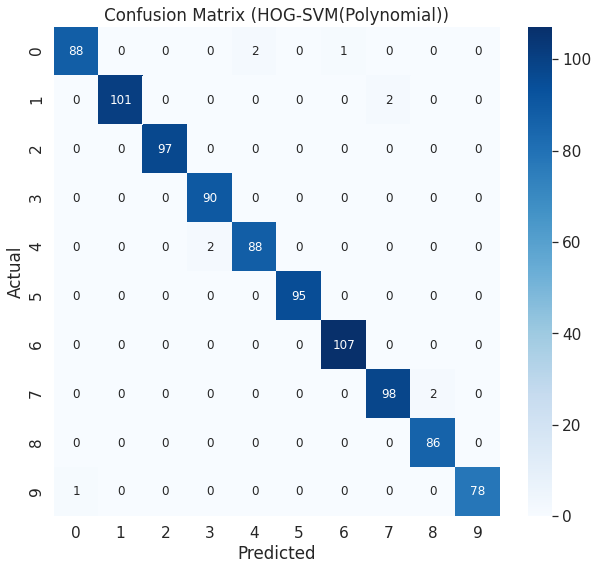

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


data = confusion_matrix(y_test, poly_pred)
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,9))
plt.title('Confusion Matrix (HOG-SVM(Polynomial))')
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True, fmt= 'g' ,annot_kws={"size": 12})# font size